# FEATURE SELECTION PROCESS

- Import packages relevant to data splitting, and feature selection.
- Load data for both injured and control groups.
- Match length of injured group from randomized controlled group to create class-balanced database.
- Add BMI variable and dummy-code categorical variables to numeric. 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from boruta import BorutaPy
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
iGroup = pd.read_csv('InjuredGroup.csv')
cGroup = pd.read_csv('RandomizedControlGroup.csv')

iSample = iGroup
cSample = cGroup.sample(n = len(iGroup), random_state = 1).reset_index(drop = True)
allData = iSample.append(cSample).reset_index(drop = True)

posDict = {'PG' : '1', 'SG' : '2', 'SF' : '3', 'PF' : '4', 'C' : '5'}
allData.replace({"Position": posDict}, inplace = True)

allData['Experience'] = allData['Experience'].replace("R", "0")
allData = allData.drop(['Injury'], axis = 1)
allData.insert(9, 'BMI', round((allData['Weight'] / 2.205) / ((allData['Height'] * 2.54) / 100) ** 2, 2))

allData[['Position', 'Experience', 'BMI']] = allData[['Position', 'Experience', 'BMI']].apply(pd.to_numeric)

allData = allData.sample(frac = 1).reset_index(drop = True)

# FEATURE SELECTION

- Create list of strings for features from column names
- Create numeric array of feature values for all candidate predictors
- Create numeric array of class labels for all players in the database.
- Generate training set to use for feature selection process involving: 
- --BorutaPY (w. Random Forest and XGBoost Classifiers)
- --SelectKBest Feature Selection Algorithm


In [3]:
features = allData.loc[:,'Age' : 'PreInjMinDiff'].columns
X = allData.loc[:,'Age' : 'PreInjMinDiff'].values
Y = allData['Class'].values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)


randFor = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', max_depth = 5)

RFSelector = BorutaPy(randFor, n_estimators = 'auto', verbose = 2, random_state = 1)
RFSelector.fit(X_train, y_train)
RFDF = pd.DataFrame(features, columns = ['Feature'])
RFDF['Rank'] = RFSelector.ranking_
RFDF.sort_values('Rank').reset_index(drop = True).head(6)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	14
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	14
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	14
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	14
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	15
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	15
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	15
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	15
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	15
I

,Feature,Rank
0,Age,1
1,PreInjAVGmins,1
2,GamesAboveAVGminShare,1
3,BMI,1
4,AVGmins,1
5,Experience,1


In [4]:
import xgboost as xgb

XGB = xgb.XGBClassifier(use_label_encoder = False)
XGBSelector = BorutaPy(XGB, n_estimators = 'auto', verbose = 2, random_state = 1)
XGBSelector.fit(X_train, y_train)
XGBDF = pd.DataFrame(features, columns = ['Feature'])
XGBDF['Rank'] = XGBSelector.ranking_
XGBDF.sort_values('Rank').reset_index(drop = True).head(6)

[18:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
[18:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
[18:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set e

Iteration: 	23 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	17
[18:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	24 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	17
[18:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	25 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	17
[18:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:

Iteration: 	45 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	18
[18:56:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	46 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	18
[18:56:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	47 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	18
[18:56:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:

Iteration: 	67 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	18
[18:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	68 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	18
[18:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration: 	69 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	18
[18:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:

,Feature,Rank
0,OffDays,1
1,Experience,1
2,AVGmins,1
3,GamesAboveAVGminShare,1
4,Height,2
5,Age,3


In [5]:
allData.to_csv('TrainTestSample.csv', index = False)

Text(0.5, 1.0, 'Predictor Variable Importance')

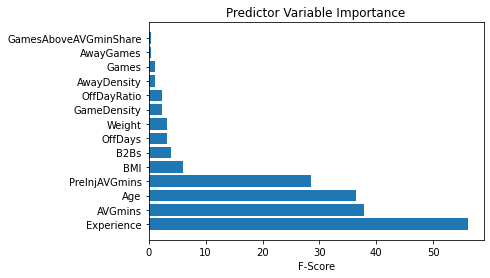

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

selector = SelectKBest(score_func = f_classif, k = 5)

selector.fit(X_train, y_train)

xTrainFS = selector.transform(X_train)
xTestFS = selector.transform(X_test)

KBest = pd.DataFrame(features, columns = ['Feature'])
KBest['F-Score'] = selector.scores_

KBest = KBest.sort_values('F-Score', ascending = False).reset_index(drop = True)

plt.barh(KBest['Feature'].iloc[0:14], KBest['F-Score'].iloc[0:14])
plt.xticks(rotation = 0)
plt.xlabel('F-Score')
plt.title('Predictor Variable Importance')

# QUALITATIVELY ASSESS INTER-RELATEDNESS OF PREDICTORS

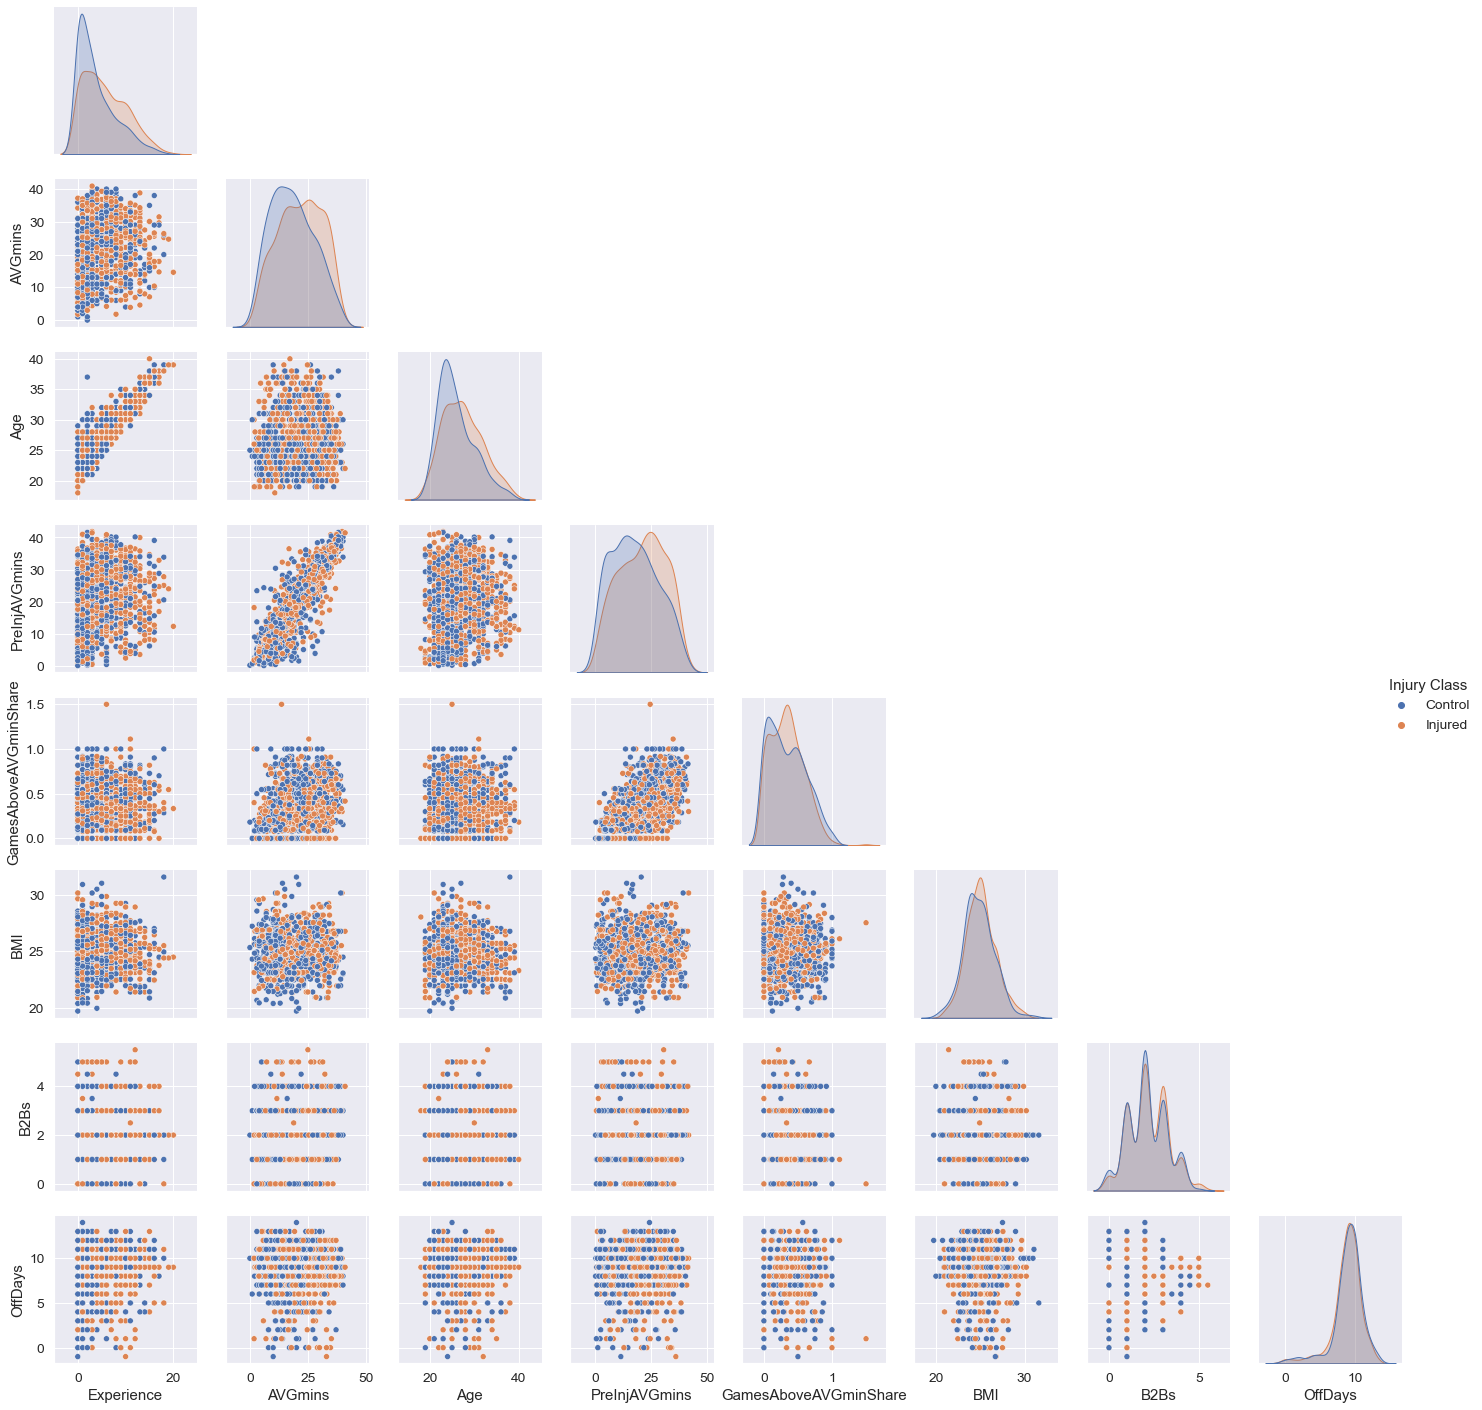

In [25]:
splot = allData[['Experience', 'AVGmins', 'Age', 'PreInjAVGmins', 'GamesAboveAVGminShare', 'BMI', 'B2Bs', 'OffDays', 'Class']]

sns.set(font_scale=1.25)
g = sns.pairplot(splot, hue = 'Class', corner = True)

new_title = 'Injury Class'
g._legend.set_title(new_title)
new_labels = ['Control', 'Injured']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)